In [57]:
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.nan)

df = pd.read_csv('data/seeds-width-vs-length.csv')

grains = df.values

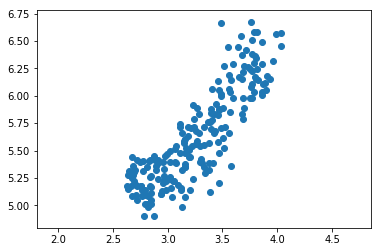

0.8604405325922295


In [2]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

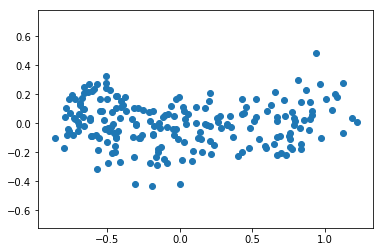

-0.000000


In [3]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print('{:f}'.format(correlation))

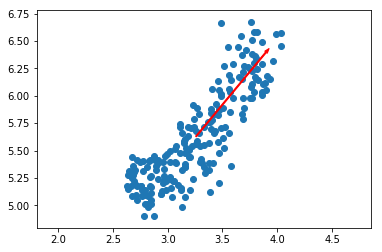

In [4]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

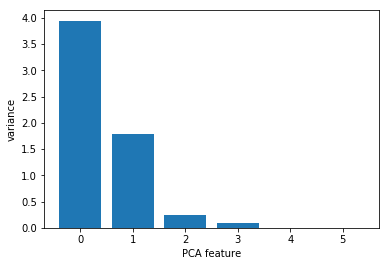

In [5]:
df1 = pd.read_csv('data/fish.csv',header=None)

fsamp = df1.iloc[:,1:].values

#print(fsamp)

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(fsamp)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [8]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(fsamp)

# Transform the scaled samples: pca_features
pca_features = pca.transform(fsamp)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [4]:
#sample text
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [95]:
#Using sparse matrix

df2 = pd.read_csv('data/wiki/wikipedia-vectors.csv')

titles = df2.iloc[:,1:].columns.values

row = df2.iloc[:,1:].values
mat = csc_matrix(row)

mat = np.transpose(mat)
articles = mat.tocsr()

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

print(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

  (0, 16)	0.024688249778400003
  (0, 32)	0.0239370711117
  (0, 33)	0.0210896267411
  (0, 137)	0.012295430569100001
  (0, 170)	0.0201970729329
  (0, 176)	0.013691446540099999
  (0, 306)	0.0202448587683
  (0, 384)	0.0300214109746
  (0, 442)	0.0156524310024
  (0, 498)	0.0169308799695
  (0, 504)	0.029291794862900004
  (0, 594)	0.033829482483
  (0, 617)	0.0129978625997
  (0, 689)	0.0132663498394
  (0, 714)	0.0210351304783
  (0, 887)	0.0153774718852
  (0, 953)	0.057097106304
  (0, 965)	0.0241013794769
  (0, 986)	0.0200325761598
  (0, 1089)	0.0174320390598
  (0, 1216)	0.0127849075552
  (0, 1314)	0.0267947689228
  (0, 1418)	0.017119438416
  (0, 1437)	0.0325627503942
  (0, 1497)	0.0350909326779
  :	:
  (59, 12953)	0.010874195498799998
  (59, 12955)	0.0140386753058
  (59, 12969)	0.012038413353799998
  (59, 12979)	0.015129330311200001
  (59, 13016)	0.0190449970264
  (59, 13017)	0.061642595846100004
  (59, 13018)	0.07671349466260001
  (59, 13024)	0.0206058183704
  (59, 13029)	0.0109577430503
  (59

In [96]:
#another dimension reduction technique is Non-negative matrix factorization.
#NMF is easier to comprehend

8